In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from segmentflow import segment, view
from skimage import transform

In [2]:
img_dir = Path(
    r'C:\Users\gusb\Research\mhe-analysis\data\IDOX_prill_1'
    r'\prill_1_no_compression'
)
file_suffix = '.tiff'
# imgs = segment.load_images(img_dir)

In [3]:
test = [i for i in range(10)]
print(test)
test_2 = [i for i in test[::2]]
print(test_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]


In [6]:
def save_rescaled(img_dir, new_dir_path, file_suffix='.tiff', scale=0.5):
    Path(new_dir_path).mkdir(exist_ok=False)
    img_path_list = [
        path for path in Path(img_dir).glob(f'*{file_suffix}')
    ]
    n_rescaled = int(len(img_path_list) * scale)
    n_digits = len(str(n_rescaled))
    for i, img_path in enumerate(img_path_list[::int(1/scale)]):
        img = iio.imread(img_path)
        img = transform.rescale(img, scale, anti_aliasing=False)
        iio.imwrite(
            Path(new_dir_path) / (
                f'rescaled_{str(i).zfill(n_digits)}.{file_suffix}'
            ), img
        )
    print(f'{i} image(s) saved:')
    print(new_dir_path)

scale = 0.25
rescaled_img_dir = Path(img_dir).parent / f'prill_1_{scale}-scale'
save_rescaled(img_dir, rescaled_img_dir, scale=0.25)

497 image(s) saved:
C:\Users\gusb\Research\mhe-analysis\data\IDOX_prill_1\prill_1_0.25-scale


Loading images...
--> Images loaded as 3D array:  (498, 508, 496)
--> Plotting images: [100, 250, 400]


(<Figure size 750x256.048 with 3 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object))

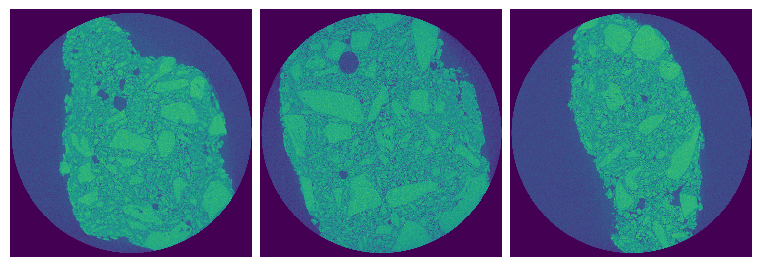

In [7]:
imgs = segment.load_images(rescaled_img_dir)
view.vol_slices(imgs, slices=[100, 250, 400])